# Feature Engineering Notebook

This notebook takes the reconfigured files from the first notebook and explores the data.  We create new features and get the data in the proper format for analysis.  

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
import datatools

%matplotlib inline

In [2]:
#Bring in the data

nba = pd.read_csv('./data/nba_combined.csv')

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Look at the Data

Let us look at the Distribution of the win margins that we will try and predict as well as how well the line does in separating the data.

We also want to look at the value of the points throughout the dataset. As line shopping can be an important factor in final win percentage. 

In [3]:
print('The standard deviation of the Win Margins is ',np.std(nba.home_win_margin))
print('The mean home winning margin is ', nba.home_win_margin.mean())

The standard deviation of the Win Margins is  13.187430525266322
The mean home winning margin is  3.0525970987365465


In [4]:
graph = datatools.DataGrapher()

Let Graph


In [5]:
graph.getdata(nba)

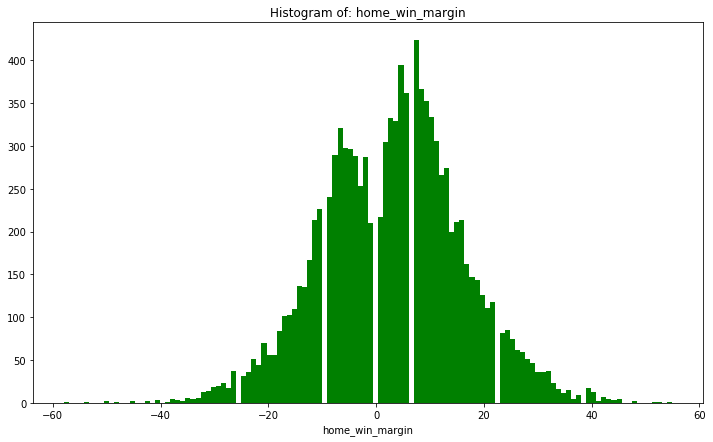

In [6]:
graph.plothist('home_win_margin', bins = 120)

In [7]:
nba.home_win_margin.value_counts(normalize= True)

 7.0     0.039588
 5.0     0.036874
 8.0     0.034254
 6.0     0.033879
 9.0     0.032943
 10.0    0.031259
 3.0     0.031165
 4.0     0.030791
-7.0     0.030042
 11.0    0.028638
 2.0     0.028545
-6.0     0.027890
-5.0     0.027702
-8.0     0.027047
-4.0     0.026954
-2.0     0.026860
 13.0    0.025643
 12.0    0.024895
-3.0     0.023678
-9.0     0.022461
-10.0    0.021151
 1.0     0.020309
-11.0    0.020028
 16.0    0.020028
 15.0    0.019747
-1.0     0.019654
 14.0    0.018718
-12.0    0.015629
 17.0    0.015161
 18.0    0.013758
           ...   
 36.0    0.001404
-31.0    0.001310
-32.0    0.001217
 40.0    0.001217
 35.0    0.001123
 38.0    0.000842
 42.0    0.000655
-33.0    0.000562
-35.0    0.000562
 45.0    0.000468
 43.0    0.000468
 37.0    0.000468
-34.0    0.000374
-38.0    0.000374
-37.0    0.000281
 44.0    0.000281
-41.0    0.000281
 41.0    0.000187
-36.0    0.000187
 48.0    0.000187
-42.0    0.000187
-45.0    0.000187
-50.0    0.000187
-48.0    0.000094
-39.0    0

Here we can see the importance of some numbers.  The most common outcome is the a home win of 7 that occurs 3.96% of the time.  Since we need 52.38% win rate getting a better line can in many cases overcome the percentage needed to win. Thus it can be critical to have multiple line options

In [8]:
print('The standard deviation of bookmaker errors ',np.std(nba.line_cv))
print('The mean of bookmaker errors', nba.line_cv.mean())

The standard deviation of bookmaker errors  11.759870381715213
The mean of bookmaker errors -0.28310248011230693


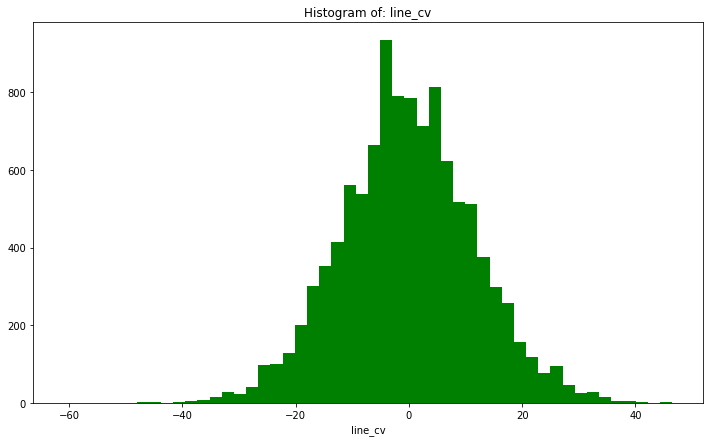

In [9]:
graph.plothist('line_cv')

The Error from the line is pretty normally distributed around zero.  With a mean of .2 and standard deviation of 11.  The standard deviation is high but that is to be expected.  Anyone that has ever watch an NBA game knows that there is large variance at the end of games with teams fouling and shooting with irregularity based on no real reason other than that games characteristics

In [10]:
print('The standard deviation of home_win_margin ',np.std(nba.home_win_margin))
print('The mean of home_win_margin', nba.home_win_margin.mean())

The standard deviation of home_win_margin  13.187430525266322
The mean of home_win_margin 3.0525970987365465


In [11]:
nba.cover.value_counts()

0    5604
1    5081
Name: cover, dtype: int64

In [12]:
nba.cover.value_counts(normalize = True)

0    0.524474
1    0.475526
Name: cover, dtype: float64

Historically the away team has covered 52.36% of the time.  This would suggest that it might be easiest to identify away teams to beat the 52.38 percent mark.

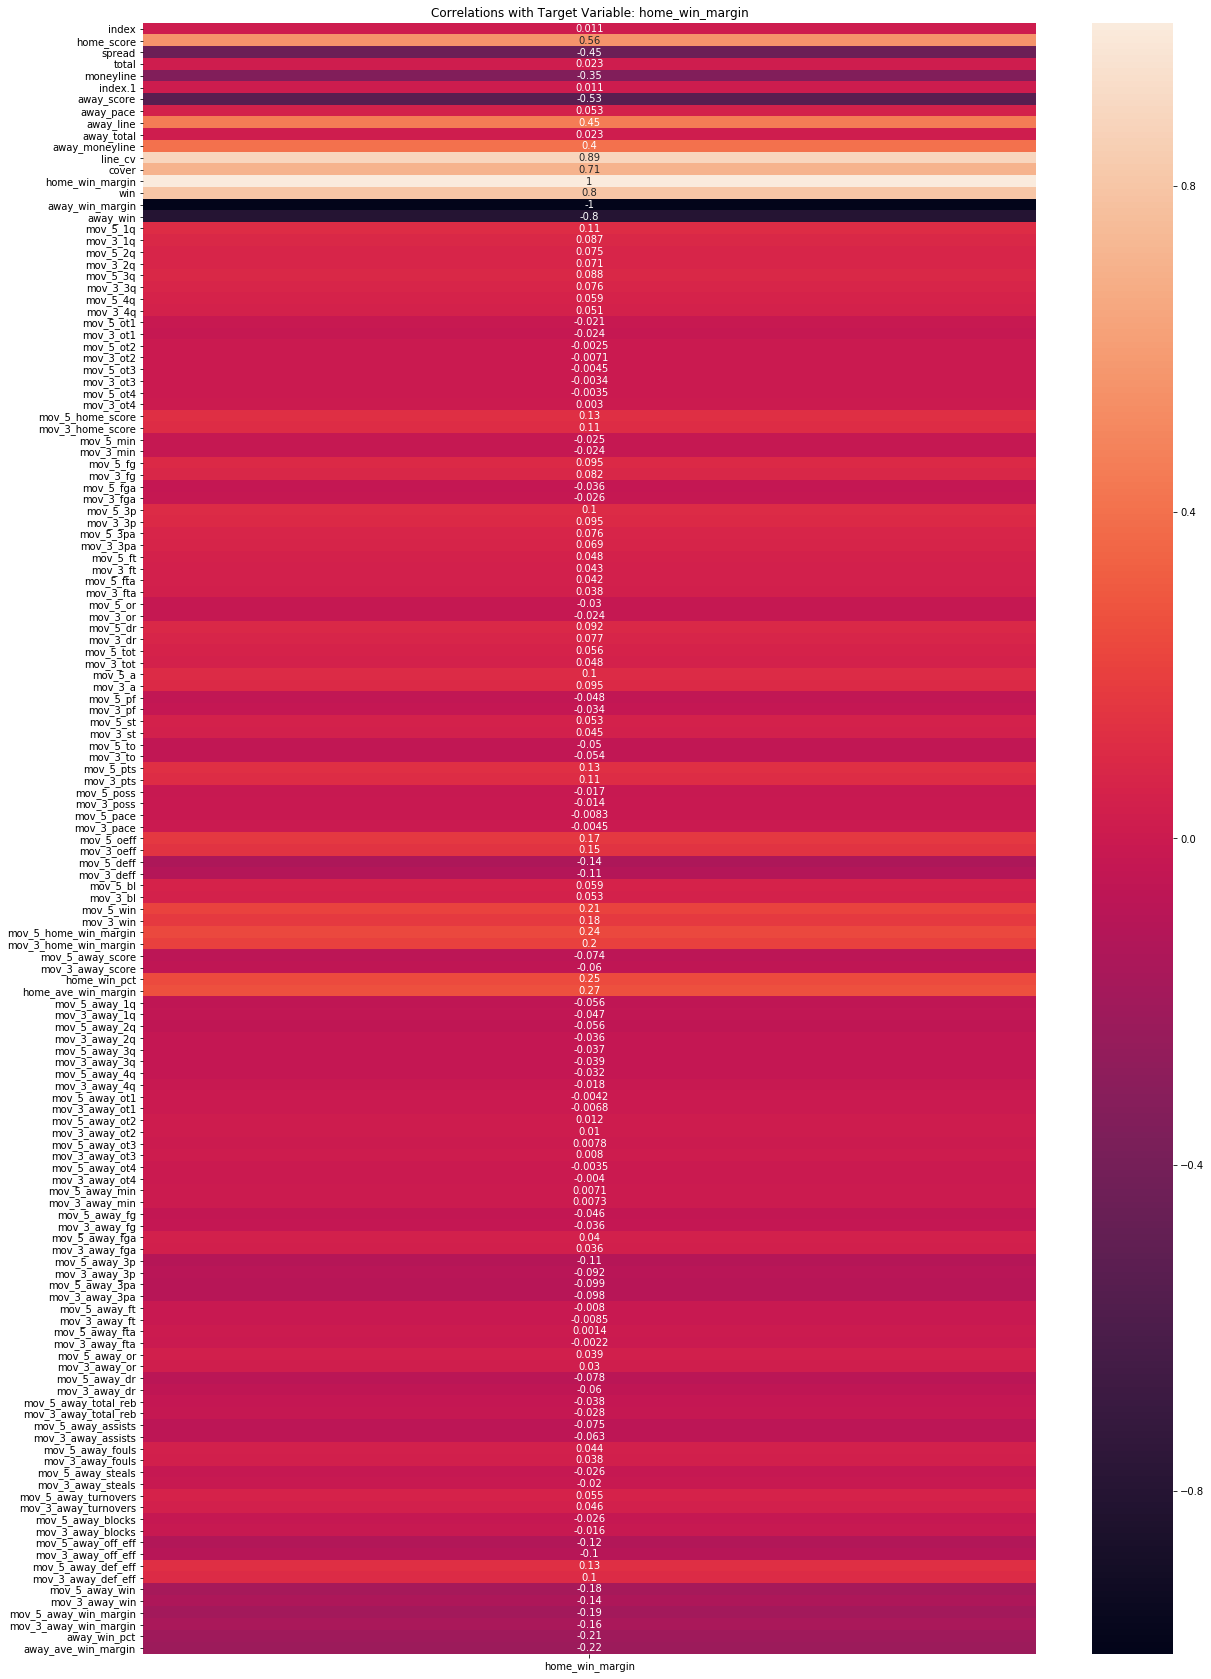

In [13]:
graph.plotheatc('home_win_margin')

#### Spread 

One would expect the spread to be a predictor of home win margin as it is the line the books put out to divide the action.  The spread should move with the actual win margin.

In [14]:
nba.groupby('spread').cover.mean()

spread
-22.50    1.000000
-21.50    1.000000
-21.00    0.000000
-20.50    1.000000
-20.00    0.000000
-19.50    0.500000
-19.00    0.666667
-18.00    0.142857
-17.50    0.500000
-17.00    0.444444
-16.50    0.333333
-16.00    0.500000
-15.50    0.400000
-15.00    0.622222
-14.50    0.562500
-14.00    0.268657
-13.50    0.459770
-13.00    0.415842
-12.50    0.446429
-12.00    0.447368
-11.50    0.405229
-11.00    0.491525
-10.50    0.524096
-10.45    1.000000
-10.00    0.458182
-9.50     0.497908
-9.00     0.479592
-8.50     0.516892
-8.00     0.441077
-7.50     0.519757
            ...   
 1.50     0.504386
 2.00     0.443439
 2.50     0.502415
 3.00     0.461847
 3.50     0.502283
 4.00     0.497717
 4.50     0.430769
 5.00     0.413265
 5.50     0.462366
 6.00     0.398734
 6.50     0.432432
 7.00     0.427350
 7.50     0.514563
 8.00     0.467532
 8.50     0.544118
 9.00     0.301587
 9.50     0.393939
 10.00    0.354839
 10.50    0.450000
 11.00    0.736842
 11.50    0.400000
 12.0

In [15]:
nba.spread.value_counts()

-5.00     399
-3.00     382
-6.00     378
-4.00     375
-7.00     373
-4.50     371
-3.50     365
-5.50     353
-6.50     346
-7.50     329
-2.00     326
-1.00     323
-2.50     298
-8.00     297
-8.50     296
-9.00     294
-10.00    275
 1.00     263
 3.00     249
-1.50     245
-9.50     239
 1.50     228
 2.00     221
 4.00     219
 3.50     219
 2.50     207
 5.00     196
 4.50     195
 5.50     186
-11.00    177
         ... 
-15.00     45
-15.50     35
 9.50      33
 10.00     31
-16.00     28
 10.50     20
 11.00     19
-16.50     18
 11.50     10
-17.00      9
 13.00      9
 12.00      8
-17.50      8
-0.50       7
-18.00      7
 14.00      4
 12.50      4
 14.50      4
 16.00      3
-19.00      3
-19.50      2
 15.00      2
 13.50      2
-20.00      1
-20.50      1
-21.00      1
-10.45      1
-22.50      1
-21.50      1
 16.50      1
Name: spread, Length: 76, dtype: int64

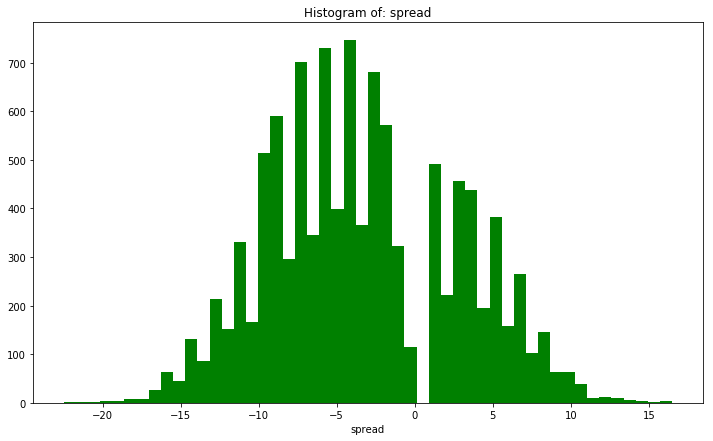

In [16]:
graph.plothist('spread')

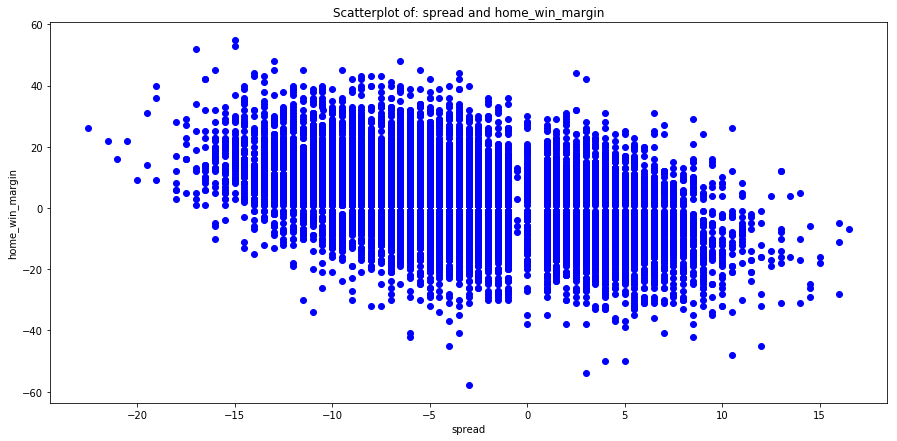

In [17]:
graph.plotscat('spread', 'home_win_margin')

In [21]:
nba.home_win_margin.corr(nba.spread)
#strong negative correlation as expected since line is opposite of win
#margin

-0.4525616530508494

### Changing Rest Features to Dummies

The NBA schedule is not fixed and many teams have a different amount or rest entering games.  Last season they changed some rules and started the season earlier to make the season less taxing, but it is still important to account for the various

We will create a variable for each.  This will greatly expand our number of features as will future dummying that is, but the plan is to do feature extraction using Principal Components analysis so the feature increase should not be too onerous on the model.


In [24]:
nba = pd.get_dummies(nba , columns= ['away_rest', 'rest_days'], drop_first= True)

### Teams Dummies

It is also important to distinguish between teams teams venues and support might influence the outcomes of games.  Here we dummy teams accomplish that goal.



In [26]:
nba = nba = pd.get_dummies(nba, columns = ['teams', 'away_team'], drop_first = True)

### Referee Dummies 

The final dummy conversions are for the referee information.  Three referees generally work an NBA game.  We have the values for each and will convert them to dummies to incorporate any referee tendencies.

In [29]:
pd.get_dummies(nba, columns = ['main_referee', 'ref_3'], drop_first = True)

,index,dataset,date,venue,home_score,starting_lineups,home_starter2,home_starter3,home_starter4,home_starter5,...,ref_3_Steven Anderson,ref_3_Tim Donaghy,ref_3_Tom Washington,ref_3_Tommy Nunez,ref_3_Tommy Nunez Jr.,ref_3_Tony Brothers,ref_3_Tony Brown,ref_3_Tre Maddox,ref_3_Violet Palmer,ref_3_Zach Zarba
0,1245.0,2006-2007 Regular Season,2007-01-24,Home,76.0,R. Gomes,G. Green,A. Jefferson,K. Perkins,D. West,...,0,0,0,0,0,0,0,0,0,0
1,1921.0,2006-2007 Regular Season,2007-03-14,Home,109.0,A. Jefferson,K. Perkins,P. Pierce,R. Rondo,D. West,...,0,0,0,0,0,0,0,0,0,0
2,1181.0,2006-2007 Regular Season,2007-01-20,Home,104.0,D. Anderson,M. Carroll,J. McInnis,E. Okafor,G. Wallace,...,0,0,0,0,0,0,0,0,0,0
3,2117.0,2006-2007 Regular Season,2007-03-28,Home,101.0,M. Carroll,R. Felton,W. Herrmann,J. Voskuhl,G. Wallace,...,0,0,0,0,0,0,0,0,0,0
4,1231.0,2006-2007 Regular Season,2007-01-23,Home,94.0,P. Brown,L. Deng,B. Gordon,K. Hinrich,B. Wallace,...,0,0,0,0,0,0,0,0,1,0
5,1583.0,2006-2007 Regular Season,2007-02-20,Home,106.0,P. Brown,L. Deng,B. Gordon,K. Hinrich,B. Wallace,...,0,0,0,0,0,0,0,0,0,0
6,103.0,2006-2007 Regular Season,2006-11-07,Home,95.0,D. Gooden,L. Hughes,Z. Ilgauskas,L. James,E. Snow,...,0,0,0,0,0,0,0,0,0,0
7,2375.0,2006-2007 Regular Season,2007-04-14,Home,110.0,D. Gooden,L. Hughes,Z. Ilgauskas,L. James,S. Pavlovic,...,0,0,0,0,0,0,0,0,0,0
8,1689.0,2006-2007 Regular Season,2007-02-26,Home,110.0,E. Dampier,D. Harris,J. Howard,D. Nowitzki,J. Terry,...,0,0,0,0,0,0,0,0,0,0
9,537.0,2006-2007 Regular Season,2006-12-06,Home,96.0,C. Anthony,M. Camby,A. Miller,E. Najera,J. Smith,...,0,0,0,0,0,0,0,0,0,0


### Cumulative Stats Variables

There are for cumulative stats variable we generated Average win margin and Average win percentage for both home and away variables

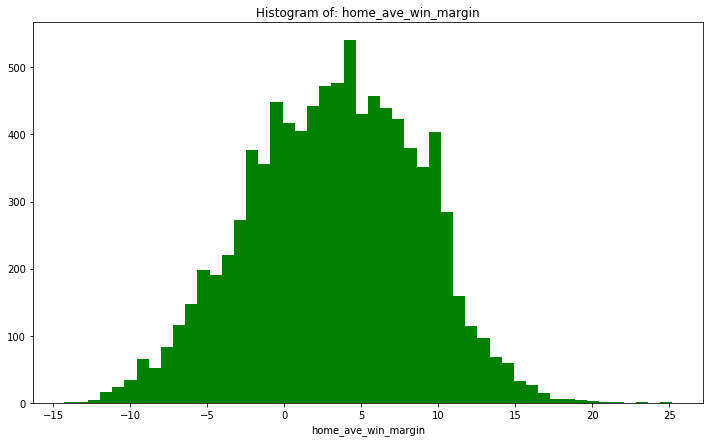

In [77]:
graph.plothist('home_ave_win_margin')

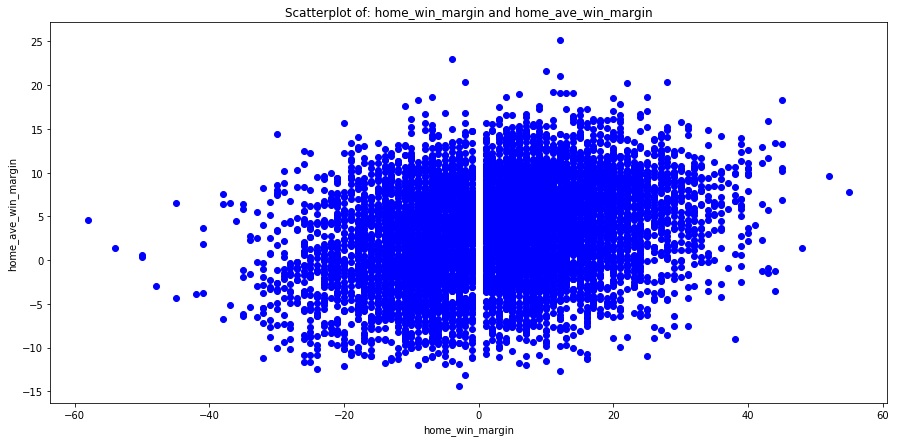

In [78]:
graph.plotscat('home_win_margin', 'home_ave_win_margin')

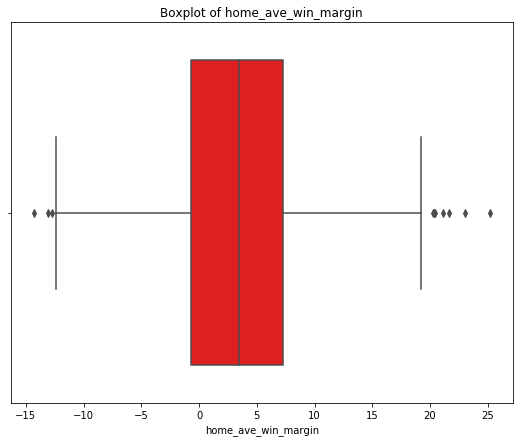

In [79]:
graph.plotbox('home_ave_win_margin')

In [80]:
nba.home_win_margin.corr(nba.home_ave_win_margin)
#strong positive correlation

0.3015112892782498

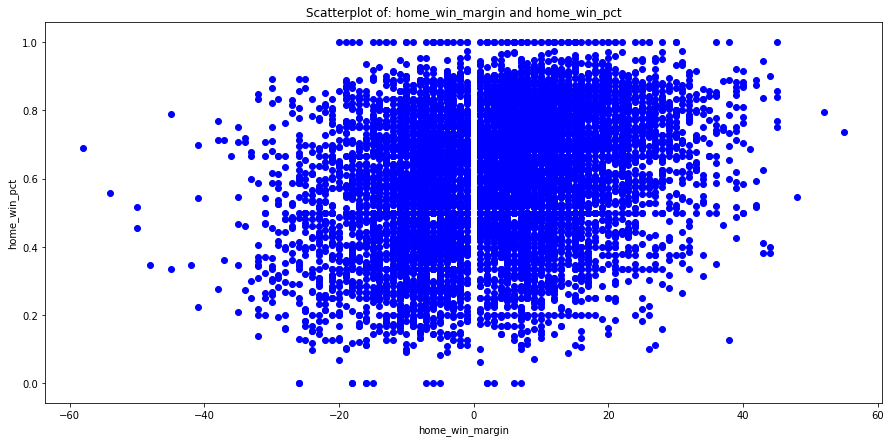

In [81]:
graph.plotscat('home_win_margin', 'home_win_pct')

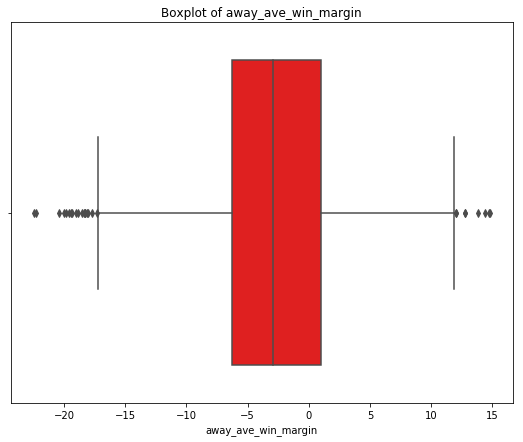

In [82]:
graph.plotbox('away_ave_win_margin')

In [83]:
nba.home_win_margin.corr(nba.home_win_pct)
#strong positive correlation

0.284736287852054

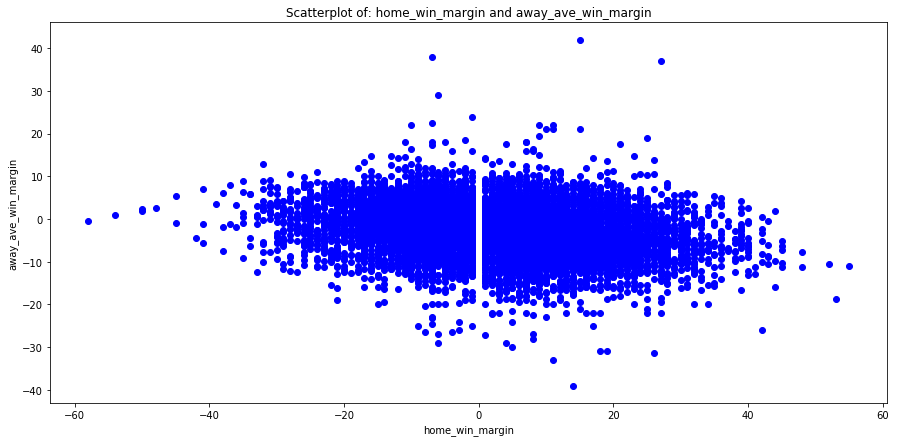

In [112]:
graph.plotscat('home_win_margin', 'away_ave_win_margin')

In [ ]:
nba.home_win_margin.corr(nba.away_ave_win_margin)


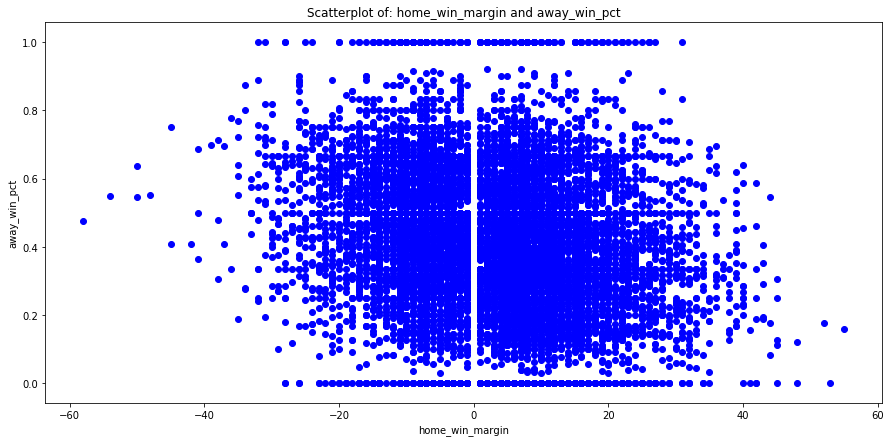

In [114]:
graph.plotscat('home_win_margin', 'away_win_pct')

In [115]:
nba.home_win_margin.corr(nba.away_win_pct)


-0.20733558151023065

### Relative Offensive and Defensive efficiencies

In [ ]:

plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_oeff)
plt.title("5 Game Home Offensive Efficeincy Numbers")

In [ ]:
nba.home_win_margin.corr(nba.mov_5_oeff)

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_away_off_eff)
plt.title("5 Game Away Offensive Efficeincy Numbers")

In [ ]:
nba.home_win_margin.corr(nba.mov_5_away_off_eff)

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_3_oeff)
plt.title("3 Game Home Offensive Efficeincy Numbers")

In [ ]:
nba.home_win_margin.corr(nba.mov_3_oeff)

In [ ]:
#eff ratio ratio by line for 3 and 5 game moving averages
nba['eff_ratio1'] = ((nba.mov_5_deff )/(nba.mov_5_away_def_eff ))  
nba['eff_ratio2'] = (nba.mov_5_oeff/ nba.mov_5_away_off_eff) 
nba['eff_ratio3'] = ((nba.mov_3_deff )/(nba.mov_3_away_def_eff ))  
nba['eff_ratio4'] = (nba.mov_3_oeff/ nba.mov_3_away_off_eff)  

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.eff_ratio2)
plt.title("5 Game Offensive efficiency ratio")

In [ ]:
nba.home_win_margin.corr(nba.eff_ratio1)

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_away_win_margin)
plt.title("5 Game Away Win Margin Moving Average")

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_home_win_margin)
plt.title("5 Game Home Win Margin Moving Average")

In [ ]:
nba['win_margin_ratio'] = (nba.mov_5_home_win_margin)/(nba.mov_5_away_win_margin)

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_3pa)
plt.title("5 Game Home Win Margin Moving Average")

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_away_3pa)
plt.title("5 Game Away 3 Point Attempts")

In [ ]:
nba['home_score_margin'] = nba.mov_5_home_score*nba.home_ave_win_margin
nba['away_score_margin'] = nba.mov_5_away_score*nba.away_ave_win_margin

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.home_score_margin)
plt.title("5 Game Home Score * Cumulative Win Margin")

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.home_score_margin)
plt.title("5 Game Away Score * Cumulative Away Win Margin")

###  Traveling to High Altitude Locations

Traveling to high altitude locations can be tiring for players not used to altitude.  Check to see if these location make a difference.

In [ ]:
nba['high_alt'] = nba.teams.map(lambda x: 1 if (x == "Denver") or 
                                (x== "Utah") else 0)

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.high_alt)
plt.title("High Altitude Games")

#### Assists

In [ ]:
plt.gcf()
sns.distplot(nba.mov_5_a)
plt.title("5 Game Away Assist Average")

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_a)
plt.title("5 Game Home Assist Average")

In [ ]:
plt.gcf()
sns.distplot(nba.mov_5_away_assists)
plt.title("5 Game Away Assist Average")

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_away_assists)
plt.title("5 Game Home Assist Average")

In [ ]:
assist_ratio = nba.mov_5_a/nba.mov_5_away_assists

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, assist_ratio)
plt.title("5 Game Home Assist Average")

#### Three Point Attempts

### Travel from West Coast/ East Coast

It is hypothesized that Traveling from West Coast to East Coast is more difficult as losing time makes it tougher to acclimate.  Check to see if this is a factor

In [ ]:
### Travel Distance

In [ ]:
nba.dataset.value_counts()

### Playoff Games

Currently, the data sets contain both regular season and playoff games.  Here I create a feature dummy variable that indicates the game is a playoff game.

In [ ]:
nba['playoff_game'] = nba.dataset.map(lambda x:1 if x[5] =='P' else 0)

In [ ]:
nba.playoff_game.value_counts()

In [ ]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.playoff_game)
plt.title("playoff games")

In [ ]:
nba.to_csv('./data/nba_analysis_data.csv', index = False)